In [799]:
import  pandas  as pd
df=pd.read_excel('小区.xlsx')
data=df.head()
data

,小区名,区,县,均价（万）,90天出售数量,正在出售数
0,乾溪新村,宝山,大场镇,40597,11,23
1,上大阳光乾和园,宝山,大场镇,42022,3,13
2,美好家小区,宝山,大场镇,50593,0,12
3,环镇北路600弄,宝山,大场镇,38717,1,9
4,同济城市阳光,宝山,大场镇,51893,7,9


In [800]:
name=df['小区名'].tolist()
district=df['区'].tolist()
county=df['县'].tolist()
average_price=df['均价（万）'].tolist()
num_90=df['90天出售数量'].tolist()
num_present=df['正在出售数'].tolist()

In [801]:
import plotly as py
import plotly.graph_objs as go
import numpy as np
all_district=list(set(district))
count=np.zeros(len(all_district))
for i in range(len(district)):
    for j in range(len(all_district)):
        if district[i]==all_district[j]:
            count[j]=count[j]+num_present[i]
num_house=sorted(dict(zip(all_district,count)).items(),key=lambda x:x[1],reverse=True)
num_house_x=[]
num_house_y=[]
for i in range(len(num_house)):
    num_house_x.append(num_house[i][0])
    num_house_y.append(num_house[i][1])


In [452]:
def lineplot(x_data, y_data, x_label="", y_label="", title=""):
    # Create the plot object
    _, ax = plt.subplots()    # Plot the best fit line, set the linewidth (lw), color and
    # transparency (alpha) of the line
    ax.plot(x_data, y_data, lw = 2, color = '#539caf', alpha = 1)    # Label the axes and provide a title
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)


# 把所有的县附到所属的区上，统计

In [453]:
from collections import Counter
dict_district={}#先构造一个字典
for i in range(len(all_district)):
    dict_district[all_district[i]]=[]
district_county=[district,county]
for i in range(len(district_county[0])):
    for j in dict_district.keys():
        if district_county[0][i]==j:
            dict_district[j].append(district_county[1][i])
for i in dict_district.keys():
    dict_district[i]=list(set(dict_district[i]))

count=np.zeros(len(all_county))
for i in range(len(county)):
    for j in range(len(all_county)):
        if county[i]==all_county[j]:
            count[j]=count[j]+num_present[i]
num_house_county=sorted(dict(zip(all_county,count)).items(),key=lambda x:x[1],reverse=True)

for i in dict_district.keys():
    for j in range(len(dict_district[i])):
        for k in dict(num_house_county).keys():
            if k==dict_district[i][j]:
                dict_district[i][j]={dict_district[i][j]:[dict(num_house_county)[k]]}
                
combine1=[county,average_price,num_present]
combine1[1]
county_pricelist=np.zeros([2,len(all_county)])
for i in range(len(combine1[0])):
    for j in range(len(county_pricelist[0])):
        if combine1[0][i]==all_county[j]:
            county_pricelist[0][j]=county_pricelist[0][j]+combine1[1][i]*combine1[2][i]
            county_pricelist[1][j]=county_pricelist[1][j]+combine1[2][i]
for i in range(len(county_pricelist[0])):
    if county_pricelist[1][i]==0:
        county_pricelist[0][i]=0
    else:
        county_pricelist[0][i]=county_pricelist[0][i]/county_pricelist[1][i]
        
for i in dict_district.keys():
    for j in range(len(dict_district[i])):
        for k in range(len(all_county)):
            if list(dict_district[i][j].keys())[0]==all_county[k]:#如果县名相等
                dict_district[i][j][list(dict_district[i][j].keys())[0]].append(int(county_pricelist[0][k]))

In [454]:
count1=np.zeros(len(all_county))
for i in range(len(county)):
    for j in range(len(all_county)):
        if county[i]==all_county[j]:
            count1[j]=count1[j]+num_90[i]
for i in dict_district.keys():
    for j in range(len(dict_district[i])):
        for k in range(len(all_county)):
            if list(dict_district[i][j].keys())[0]==all_county[k]:#如果县名相等
                dict_district[i][j][list(dict_district[i][j].keys())[0]].append(int(count1[k]))

In [455]:
dict_district

{'虹口': [{'凉城': [620.0, 57853, 73]},
  {'曲阳': [584.0, 63759, 97]},
  {'四川北路': [100.0, 74501, 8]},
  {'江湾镇': [447.0, 54315, 33]},
  {'鲁迅公园': [296.0, 63523, 45]},
  {'临平路': [400.0, 79958, 47]},
  {'北外滩': [173.0, 76353, 10]}],
 '静安': [{'静安寺': [127.0, 88082, 18]},
  {'南京西路': [466.0, 95149, 40]},
  {'曹家渡': [491.0, 90393, 31]},
  {'江宁路': [351.0, 93854, 34]}],
 '松江': [{'莘闵别墅': [577.0, 39219, 69]},
  {'泗泾': [1308.0, 33633, 219]},
  {'松江大学城': [813.0, 36894, 65]},
  {'松江老城': [785.0, 31858, 86]},
  {'九亭': [787.0, 41995, 134]},
  {'叶榭': [6.0, 19682, 0]},
  {'小昆山': [7.0, 36944, 0]},
  {'车墩': [78.0, 27133, 4]},
  {'松江新城': [691.0, 34667, 62]},
  {'佘山': [347.0, 37300, 27]},
  {'新桥': [248.0, 29337, 38]}],
 '闸北': [{'大宁': [582.0, 73601, 108]},
  {'阳城': [243.0, 57359, 30]},
  {'彭浦': [764.0, 49517, 133]},
  {'西藏北路': [472.0, 72639, 53]},
  {'闸北公园': [259.0, 63640, 31]},
  {'永和': [208.0, 51783, 32]},
  {'不夜城': [271.0, 68544, 30]}],
 '黄浦': [{'人民广场': [84.0, 90677, 8]},
  {'豫园': [121.0, 91528, 8]},
  {'董家渡': [82.

In [456]:
analysis1=[]#各个县的售房数量
analysis2=[]#各个县的房价
analysis3=[]#各个县90天成交数
for i in dict_district.keys():
    for j in range(len(dict_district[i])):
        analysis1.append(dict_district[i][j][list(dict_district[i][j].keys())[0]][0])
        analysis2.append(dict_district[i][j][list(dict_district[i][j].keys())[0]][1])
        analysis3.append(dict_district[i][j][list(dict_district[i][j].keys())[0]][2])

In [457]:
dist_len=[]
count=0
num_district_house=np.zeros(len(all_district))
for i in dict_district.keys():
    for j in range(len(dict_district[i])):
        count=count+list(dict_district[i][j].values())[0][0]
    num_district_house[all_district.index(i)]=count
    count=0

In [459]:
dict_district
use_county=['凉城','曲阳','江湾镇','临平路','泗泾','九亭','松江大学城','莘闵别墅','彭浦','大宁','西藏北路','不夜城','曹家渡','南京西路','江宁路','静安寺','蓬莱公园','五里桥','打浦桥','世博滨江','徐家汇','龙华','康健','华东理工']

In [460]:
labels =all_district[:13]+all_district[14:]
sizes = list(num_district_house)[:13]+list(num_district_house[14:])
len(sizes)

17

In [546]:
for i in range(len(8)):
    analysis1_test+str(i)=analysis1[c_d[i]:c_d[i+1]]
    analysis2_test+str(i)=analysis2[c_d[i]:c_d[i+1]]
    analysis3_test+str(i)=analysis3[c_d[i]:c_d[i+1]]
    cc_colors+str(i)=c_colors[c_d[i]:c_d[i+1]]

SyntaxError: can't assign to operator (<ipython-input-546-33396989ca7c>, line 2)

# 价格最高的小区

In [882]:
price_1=[]
for i in range(len(name)):
    price_1.append([name[i],average_price[i]])
price_2=sorted(price_1,key=lambda x:x[1],reverse=True)

In [887]:
price_most=[]
for i in range(len(price_2)):
    for j in range(len(name)):
        if(price_2[i][0]==name[j] and num_90[j]>2):
            price_most.append(price_2[i])
price_most

[['远中风华园(公寓)', 125302],
 ['梅园六街坊', 125277],
 ['静安枫景苑', 120372],
 ['中凯城市之光(静安)', 120362],
 ['永业公寓', 120048],
 ['尚海湾豪庭', 117055],
 ['东方曼哈顿', 116941],
 ['百汇园', 115302],
 ['融创滨江壹号院', 114092],
 ['四方新城', 113769],
 ['梅园五街坊', 113028],
 ['梅园三街坊', 111685],
 ['泰府名邸', 110996],
 ['四和花园', 110183],
 ['上海滩新昌城', 109683],
 ['泉东(二)小区', 108362],
 ['华侨城(普陀)', 107955],
 ['凯旋一村', 107157],
 ['尚汇豪庭二期', 107041],
 ['瑞虹新城怡庭', 106012],
 ['梅园二街坊', 105431],
 ['山水国际', 104375],
 ['汇龙新城', 103940],
 ['公安大楼(徐汇)', 102655],
 ['仁恒滨江园', 102129],
 ['新福康里(公寓)', 102005],
 ['白玉兰家园', 101890],
 ['梅园四街坊', 101864],
 ['金外滩花园', 101686],
 ['潍坊十村', 100442],
 ['瑞虹新城璟庭', 100378],
 ['凯欣豪园', 99773],
 ['潍坊九村', 99214],
 ['瑞虹新城铭庭', 99022],
 ['又一村(静安)', 98327],
 ['达安锦园', 97754],
 ['汇豪天下', 97043],
 ['中南小区', 96927],
 ['乌中小区', 96787],
 ['潍坊七村', 96122],
 ['虹桥豪苑', 95747],
 ['卓悦居', 93856],
 ['瑞虹新城二期(优贤生活)', 93173],
 ['世茂滨江花园', 93122],
 ['南辉小区', 92436],
 ['中福花苑', 91643],
 ['古北嘉年华庭', 91338],
 ['徐汇苑', 90816],
 ['上海绿城', 90800],
 ['梅园三村', 90723],
 ['老西门新苑

# 各区售房占比

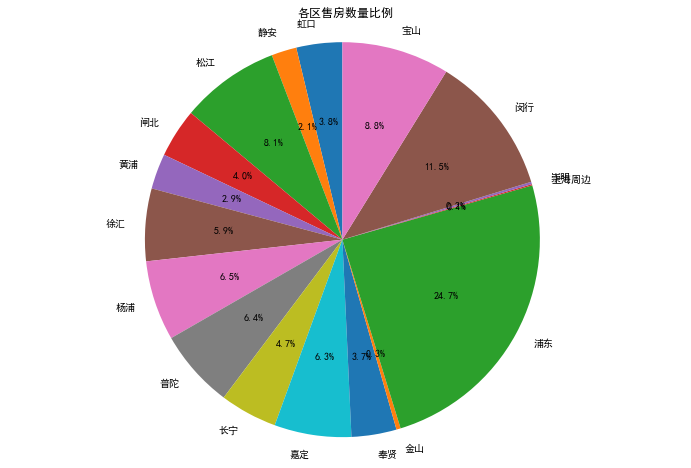

In [630]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['figure.figsize'] = (12.0, 8.0)
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels =all_district[:13]+all_district[14:]
sizes = list(num_district_house)[:13]+list(num_district_house[14:])
explode = np.zeros(len(all_district)-1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels,autopct='%1.1f%%',
         startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("各区售房数量比例")
plt.show()

# 成交的数量与在售数量的曲线差异

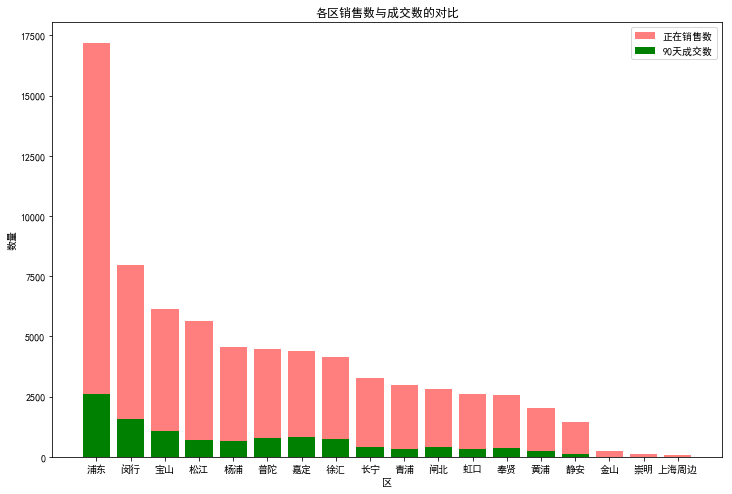

In [636]:
dist_len=[]
count=0
num_90_house=np.zeros(len(all_district))
for i in dict_district.keys():
    for j in range(len(dict_district[i])):
        count=count+list(dict_district[i][j].values())[0][2]
    num_90_house[all_district.index(i)]=count
    count=0
    
    
from pylab import *
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['axes.unicode_minus'] = False

import matplotlib as mpl
mpl.rcParams['font.sans-serif']=['SimHei']
 
import matplotlib.pyplot as plt
 
tu1=[]
for i in range(len(all_district)):
    tu1.append([all_district[i],num_district_house[i],num_90_house[i]])
tu2=sorted(tu1,key=lambda x:x[1],reverse=True)    

x=[]
y=[]
z=[]
for i in range(len(tu2)):
    x.append(tu2[i][0])
    y.append(tu2[i][1])
    z.append(tu2[i][2])
#plt.figure(figsize=(40,40))
plt.bar(x, y, alpha=0.5, color='r')
plt.bar(x, z, alpha=1, color='g')
plt.legend(["正在销售数",'90天成交数'])
# plt.legend(loc='upper left')
# plt.xticks(y, x, rotation=30)#rotation控制倾斜角度
plt.ylabel("数量")
plt.xlabel("区")
plt.title("各区销售数与成交数的对比")
plt.show()

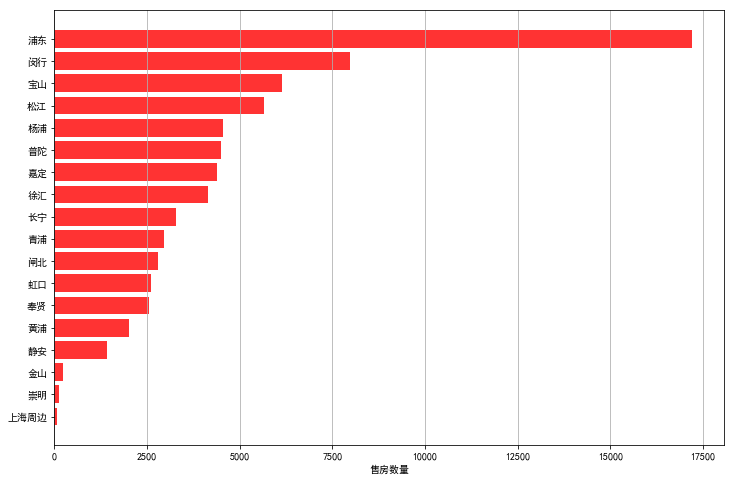

In [855]:
##### import numpy as np
from pylab import *
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['axes.unicode_minus'] = False

import matplotlib as mpl
mpl.rcParams['font.sans-serif']=['SimHei']
 
import matplotlib.pyplot as plt
 
tu1=[]
for i in range(len(all_district)):
    tu1.append([all_district[i],num_district_house[i]])
tu2=sorted(tu1,key=lambda x:x[1])    

x=[]
y=[]
for i in range(len(tu2)):
    x.append(tu2[i][0])
    y.append(tu2[i][1])
#plt.figure(figsize=(40,40))
plt.barh(x, y, alpha=0.8, color='r')
# plt.legend(loc='upper left')
# plt.xticks(y, x, rotation=30)#rotation控制倾斜角度
plt.xlabel("售房数量")
plt.grid(axis='x')
plt.show()

# 每个区的价格范围，用箱线图

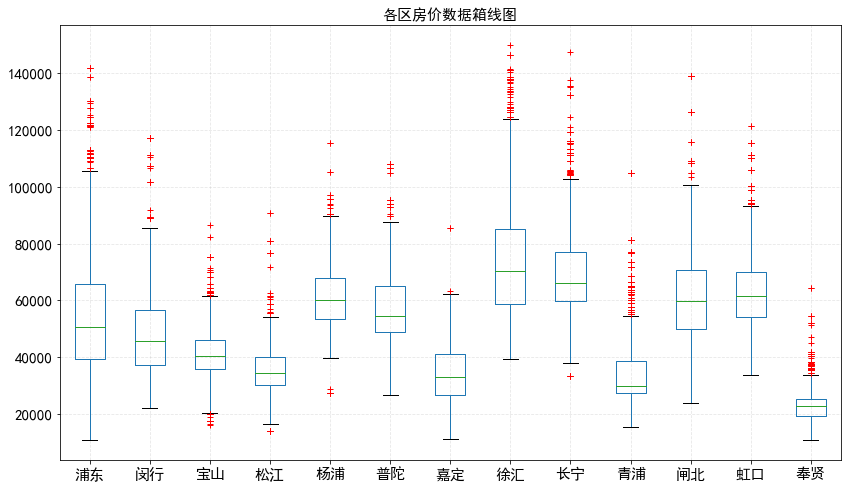

In [854]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

use_all_district=["宝山"]
for i in range(len(district)-1):
    if district[i]!=district[i+1]:
        use_all_district.append(district[i+1])
use1=x[:13]#要分析的区的列表
use2=[]
count=[]
for i in range(len(district)):
    if i==0 or district[i]==district[i-1]:
        count=count+[average_price[i]]*int(num_present[i])
    else:
        use2.append(count)
        count=[]
use2.append(count)
len(use2)
use3=[]
for i in range(len(use1)):
    for j in range(len(use_all_district)):
        if use1[i]==use_all_district[j]:
            use3.append(use2[j])

import random
temp=y[:13]
use4=[]#要分析的房价列表
for i in range(len(use3)):
    use4.append(random.sample(use3[i], 2500))


data = {
    use1[0]: use4[0],
    use1[1]: use4[1],
    use1[2]: use4[2],
    use1[3]: use4[3],
    use1[4]: use4[4],
    use1[5]: use4[5],
    use1[6]: use4[6],
    use1[7]: use4[7],
    use1[8]: use4[8],
    use1[9]: use4[9],
    use1[10]: use4[10],
    use1[11]: use4[11],
    use1[12]: use4[12]
}
df = pd.DataFrame(data)



# df.plot.box(title="Consumer spending in each country", vert=False)
fig=df.plot.box(title="各区房价数据箱线图",sym='r+',figsize=(14, 8),fontsize=15)
fig.axes.title.set_size(15)
plt.grid(linestyle="--", alpha=0.3)
plt.show()

# 横坐标：面积范围，纵坐标：数量

In [479]:
def lineplot(x_data, y_data, x_label="", y_label="", title=""):
    # Create the plot object
    _, ax = plt.subplots()    # Plot the best fit line, set the linewidth (lw), color and
    # transparency (alpha) of the line
    ax.plot(x_data, y_data, lw = 2, color = '#539caf', alpha = 1)    # Label the axes and provide a title
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)



# 各个县的成交数、在售数、均价
# 先制作关联列表

In [516]:
c_d=[]
for i in dict_district.keys():
    c_d.append(len(dict_district[i]))

colors=[]
for i in range(2):
    for j in range(2):
        for k in range(2):
            colors.append([i,j,k])
            

name_district=[]
c_colors=[]
for i in range(len(colors)):
    c_colors=c_colors+[colors[i]]*c_d[i]
    name_district=name_district+[all_district[i]]*c_d[i]
len(c_colors)

76

In [490]:
a=[1,0,1]
b=[a]*3
b

[[1, 0, 1], [1, 0, 1], [1, 0, 1]]

In [481]:
for i in 

{'虹口': [{'凉城': [620.0, 57853, 73]},
  {'曲阳': [584.0, 63759, 97]},
  {'四川北路': [100.0, 74501, 8]},
  {'江湾镇': [447.0, 54315, 33]},
  {'鲁迅公园': [296.0, 63523, 45]},
  {'临平路': [400.0, 79958, 47]},
  {'北外滩': [173.0, 76353, 10]}],
 '静安': [{'静安寺': [127.0, 88082, 18]},
  {'南京西路': [466.0, 95149, 40]},
  {'曹家渡': [491.0, 90393, 31]},
  {'江宁路': [351.0, 93854, 34]}],
 '松江': [{'莘闵别墅': [577.0, 39219, 69]},
  {'泗泾': [1308.0, 33633, 219]},
  {'松江大学城': [813.0, 36894, 65]},
  {'松江老城': [785.0, 31858, 86]},
  {'九亭': [787.0, 41995, 134]},
  {'叶榭': [6.0, 19682, 0]},
  {'小昆山': [7.0, 36944, 0]},
  {'车墩': [78.0, 27133, 4]},
  {'松江新城': [691.0, 34667, 62]},
  {'佘山': [347.0, 37300, 27]},
  {'新桥': [248.0, 29337, 38]}],
 '闸北': [{'大宁': [582.0, 73601, 108]},
  {'阳城': [243.0, 57359, 30]},
  {'彭浦': [764.0, 49517, 133]},
  {'西藏北路': [472.0, 72639, 53]},
  {'闸北公园': [259.0, 63640, 31]},
  {'永和': [208.0, 51783, 32]},
  {'不夜城': [271.0, 68544, 30]}],
 '黄浦': [{'人民广场': [84.0, 90677, 8]},
  {'豫园': [121.0, 91528, 8]},
  {'董家渡': [82.

In [507]:
[i*10 for i in analysis3_test]

In [511]:
for i in range(len(8)):
    analysis1_test=analysis1[c_d[i]:c_d[i+1]]
    analysis2_test=analysis2[c_d[i]:c_d[i+1]]
    analysis3_test=analysis3[c_d[i]:c_d[i+1]]
    cc_colors=c_colors[c_d[i]:c_d[i+1]]
    scatterplot(analysis2_test,analysis1_test,c_colors)

In [539]:
import matplotlib.pyplot as plt
import numpy as np
for i in range(len(8)):
    analysis1_test=analysis1[c_d[i]:c_d[i+1]]
    analysis2_test=analysis2[c_d[i]:c_d[i+1]]
    analysis3_test=analysis3[c_d[i]:c_d[i+1]]
    cc_colors=c_colors[c_d[i]:c_d[i+1]]
    scatterplot(analysis2_test,analysis1_test,c_colors)
        # Create the plot object
        _, ax = plt.subplots()    # Plot the data, set the size (s), color and transparency (alpha)
        # of the points
        ax.scatter(analysis2_test, analysis1_test, s = [i*10 for i in analysis3_test], color = c_colors, alpha = 0.75)    
    plt.xlabel("均价")
    plt.ylabel("成交数")
    plt.legend(all_district[0])
scatterplot(analysis2_test,analysis1_test,c_colors)

IndentationError: unexpected indent (<ipython-input-539-0a18e2059548>, line 3)

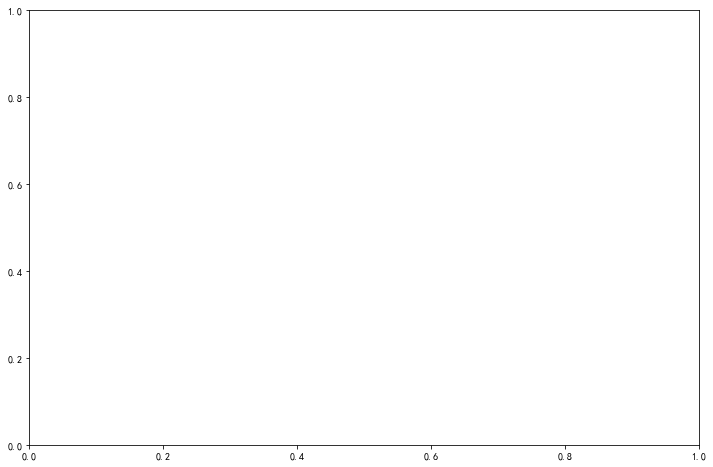

In [542]:

import matplotlib.pyplot as plt
 
plt.rcParams['font.sans-serif']=['Simhei']
plt.rcParams['axes.unicode_minus']=False

plt.figure()
axes = plt.subplot(111)
for i in range(0):
    analysis1_test=analysis1[c_d[i]:c_d[i+1]]
    analysis2_test=analysis2[c_d[i]:c_d[i+1]]
    analysis3_test=analysis3[c_d[i]:c_d[i+1]]
    cc_colors=c_colors[c_d[i]:c_d[i+1]]
    type1 = axes.scatter(analysis1_test, analysis2_test, s=[i*10 for i in analysis3_test], c=cc_colors)
    plt.legend(type1, all_district[i+1])
plt.show()


In [476]:
n=[i*10 for i in analysis3]
n

[730,
 970,
 80,
 330,
 450,
 470,
 100,
 180,
 400,
 310,
 340,
 690,
 2190,
 650,
 860,
 1340,
 0,
 0,
 40,
 620,
 270,
 380,
 1080,
 300,
 1330,
 530,
 310,
 320,
 300,
 80,
 80,
 110,
 10,
 440,
 670,
 130,
 80,
 340,
 50,
 130,
 370,
 1360,
 500,
 250,
 90,
 520,
 1020,
 1020,
 340,
 130,
 290,
 250,
 640,
 760,
 190,
 170,
 1210,
 190,
 970,
 1040,
 580,
 690,
 1430,
 320,
 250,
 520,
 670,
 870,
 540,
 370,
 280,
 470,
 320,
 440,
 1710,
 1190,
 390,
 320,
 230,
 230,
 600,
 530,
 240,
 420,
 1070,
 840,
 90,
 720,
 50,
 970,
 10,
 10,
 2070,
 920,
 660,
 280,
 1700,
 80,
 1520,
 10,
 510,
 110,
 170,
 0,
 60,
 1270,
 0,
 0,
 0,
 0,
 0,
 0,
 20,
 10,
 0,
 0,
 130,
 2020,
 630,
 290,
 900,
 1270,
 280,
 440,
 70,
 890,
 590,
 60,
 730,
 0,
 510,
 1920,
 680,
 160,
 1020,
 850,
 490,
 90,
 340,
 2100,
 120,
 880,
 730,
 370,
 580,
 250,
 2250,
 260,
 1530,
 200,
 570,
 1870,
 210,
 10,
 150,
 810,
 190,
 170,
 310,
 90,
 910,
 30,
 480,
 10,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 20,
 0